In [314]:
import pandas as pd
import numpy as np
import duckdb

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)

db = duckdb.connect() # No need to pass a file name, we will use a VIEW


In [365]:

db.execute('''
           DROP TABLE IF EXISTS SCHOOLS_ALL_DATA;
           CREATE TABLE SCHOOLS_ALL_DATA AS 
                SELECT 
                    'schools' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Full time equivalent number of pupils in school" "FTE Students",
                    s."% of pupils eligible for FSM" / 100 as "Percent Students FSM",
                    s."% of pupils with EHCP" / 100  "Percent Students EHCP",
                    s."% of pupils with SEN support" / 100 "Percent Students SEN",
                    s."% of pupils with English as an additional language" / 100 "Percent Students ESL",
                    s."FTE Number of teachers" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff" "Supply Staff Costs",
                    s."Education support staff",
                    s."Staff Total" "Total Staff Costs",
                    s."Maintenance & Improvement" "Maintenance & Improvement Costs",
                    s."Energy",
                    s."Educational Supplies" "Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    a.READPROG_19,
                    a.WRITPROG_19,
                    a.MATPROG_19,
                    a.READPROG_22,
                    a.WRITPROG_22,
                    a.MATPROG_22,
                    a.READPROG,
                    a.WRITPROG,
                    a.MATPROG
                    FROM parquet_scan('data/duck/schools_finance.parquet') as s
                    JOIN parquet_scan('data/duck/schools_attainment.parquet') as a
                    ON (s.URN = a.URN)
                    WHERE "Overall Phase" = 'Primary'
                UNION
                SELECT 
                    'academies' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Number of pupils in academy (FTE)"  "FTE Students",
                    (s."% of pupils eligible for FSM") / 100 as "Percent Students FSM",
                    (s."% of pupils with an EHCP") / 100  "Percent Students EHCP",
                    (s."% of pupils with SEN support") / 100 "Percent Students SEN",
                    (s."% of pupils with English as an additional language" / 100) "Percent Students ESL",
                    s."Number of teachers in academy (FTE)" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff Costs",
                    s."Education support staff",
                    s."Total Staff Costs",
                    s."Maintenance & Improvement Costs",
                    s."Energy",
                    s."Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    NULL READPROG_19,
                    NULL WRITPROG_19,
                    NULL MATPROG_19,
                    NULL READPROG_22,
                    NULL WRITPROG_22,
                    NULL MATPROG_22,
                    a.READ_PROGSCORE_EM_ADJ_WGTAVG READPROG,
                    a.WRIT_PROGSCORE_EM_ADJ_WGTAVG WRITPROG,
                    a.MAT_PROGSCORE_EM_ADJ_WGTAVG MATPROG
                    FROM parquet_scan('data/duck/academies_finance.parquet') as s
                    JOIN parquet_scan('data/duck/academies_attainment.parquet') as a
                    ON (s.UID = a.TRUST_UID)
                    WHERE "Overall Phase" = 'Primary'
                
           ''')

df = db.query("SELECT * FROM SCHOOLS_ALL_DATA").to_df()
#df['Progress'] = (df['READPROG_19'] + df['WRITPROG_19'] + df['MATPROG_19']) / 3
df


,Source,URN,Region,London Borough,School Name,Type,Overall Phase,...,MATPROG_19,READPROG_22,WRITPROG_22,MATPROG_22,READPROG,WRITPROG,MATPROG
0,academies,138252.0,Yorkshire and the Humber,Neither,Dixons Music Primary,Free schools,Primary,...,NaN,NaN,NaN,NaN,-3.4,-1.3,-1.1
1,academies,140358.0,Yorkshire and the Humber,Neither,Dixons Marchbank Primary,Academy sponsor led,Primary,...,NaN,NaN,NaN,NaN,-3.4,-1.3,-1.1
2,academies,141375.0,Yorkshire and the Humber,Neither,Dixons Manningham Academy,Academy sponsor led,Primary,...,NaN,NaN,NaN,NaN,-3.4,-1.3,-1.1
3,academies,137881.0,South East,Neither,Oaks Primary Academy - Maidstone,Academy sponsor led,Primary,...,NaN,NaN,NaN,NaN,1.4,1.3,1.9
4,academies,142517.0,South East,Neither,Cherry Orchard Primary Academy,Academy sponsor led,Primary,...,NaN,NaN,NaN,NaN,1.4,1.3,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14269,schools,120539.0,East Midlands,Neither,Swinderby All Saints Church of England Primary School,Voluntary controlled school,Primary,...,-3.6,NaN,NaN,NaN,2.3,0.7,3.4
14270,schools,120859.0,East of England,Neither,St William's Primary School,Community school,Primary,...,-1.9,NaN,NaN,NaN,-0.8,-4.1,-3.5
14271,schools,121053.0,East of England,Neither,Salhouse CofE Primary School,Voluntary controlled school,Primary,...,-4.9,NaN,NaN,NaN,-3.1,-0.8,-5.1
14272,schools,123177.0,South East,Neither,St Swithun's CofE Primary School,Voluntary controlled school,Primary,...,-2.0,NaN,NaN,NaN,2.2,-0.6,0.1


In [357]:
at = db.query("SELECT * FROM parquet_scan('data/duck/academies_attainment.parquet')").to_df()
at.loc[at['TRUST_UID'] == 2044]

,TIME_PERIOD,TIME_IDENTIFIER,TRUST_GROUP_TYPE,TRUST_NAME,TRUST_UID,TRUST_ID,TRUST_COMPANIES_HOUSE_NUMBER,...,NUMINST_INMAT,NUMINST_CONVERTER_INMAT,NUMINST_SPONSOR_INMAT,NUMINST_FREE_INMAT,TELIG_INMAT,PFSM6CLA1A_INMAT,PNOTFSM6CLA1A_INMAT
0,202223,AcademicYear,Multi-academy trust,ABBEY ACADEMIES TRUST,2044,TR00261,7318714,...,3,1,2,0,138,0.28,0.72


In [343]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16888 entries, 0 to 16887
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Source                           16888 non-null  object 
 1   URN                              16888 non-null  float64
 2   Region                           16888 non-null  object 
 3   London Borough                   16888 non-null  object 
 4   School Name                      16888 non-null  object 
 5   Type                             16888 non-null  object 
 6   Overall Phase                    16888 non-null  object 
 7   FTE Students                     16885 non-null  float64
 8   Percent Students FSM             16856 non-null  float64
 9   Percent Students EHCP            16887 non-null  float64
 10  Percent Students SEN             16887 non-null  float64
 11  Percent Students ESL             16856 non-null  float64
 12  FTE Teachers      

In [304]:
# Determine how financial prudance is measured in the education sector
# Total income, total expenditure, pupil numbers
 
df[['URN', 'School Name', 'Region', 'LA','Full time equivalent number of pupils in school', 'Total Income', 'Total Expenditure']]
df["Income per Student"] = df2['Total Income'] / df2['Full time equivalent number of pupils in school']
df["Expenditure per Student"] = df2['Total Expenditure'] / df2['Full time equivalent number of pupils in school']
df


,LA,LA Name,Region,London Borough,Estab,LAEstab,URN,School Name,Phase,Overall Phase,Lowest age of pupils,Highest age of pupils,Type,Full time equivalent number of pupils in school,Full time equivalent number of pupils in federation,% of pupils eligible for FSM,Period covered by return (months),Did Not Supply flag,Federation,Lead school in federation,FTE Number of teachers,Gender,Urban /Rural,London Weighting,% of pupils with EHCP,% of pupils with SEN support,% of pupils with English as an additional language,% of pupils who are Boarders,Admissions policy,PFI,Has a 6th form,No of pupils in 6th form,Funds delegated by the LA,Funding for 6th form students,Total pre and Post-16 Funding,SEN funding,Funding for minority ethnic pupils,Pupil Premium,Other government grants,Other grants and payments,Income from lettings,Income from facilities and services,Total income from facilities and services,Income from catering,Receipts from supply teacher insurance claims,Receipts from other insurance claims,Income from contributions to visits etc.,Donations and/or private funds,Pupil focussed extended school funding and / or grants,Community focussed school funding and / or grants,Community focused school facilities income,Income from the Coronavirus Job Retention Scheme,Income from the DfE grant scheme for reimbursing exceptional costs associated with COVID-19,Income from the £1bn COVID-19 catch-up package announced on 20 July 2020,Income from other additional grants,Total additional grant for schools,Teaching Staff,Supply teaching staff,Education support staff,Premises staff,Administrative and clerical staff,Catering staff,Cost of other staff,Indirect employee expenses,Development and training,Supply teacher insurance,Staff related insurance,Building maintenance and improvement,Grounds maintenance and improvement,Cleaning and caretaking,Water and sewerage,Energy,Rates,Other occupation costs,Learning resources (not ICT equipment),ICT learning resources,Exam fees,Administrative supplies,Other insurance premiums,Special facilities,Catering supplies,Agency supply teaching staff,Bought in professional services – curriculum,"Bought in professional services, other, not PFI","Bought in professional services, other, PFI",Total bought in professional services,Loan interest,Direct revenue financing (revenue contributions to capital),Community focused school staff,Community focused school costs,Opening pupil-focused revenue balance,Opening community-focused revenue balance,Opening capital balance,Capital income,Voluntary or private income,Direct revenue financing,Acquisition of land and existing buildings,"New construction, conversion and renovation","Vehicles, plant, equipment and machinery",Information and communication technology,Committed revenue balances,Uncommitted revenue balances,Devolved formula capital balance,Other capital balances,Community-focused school revenue balances,Outstanding balance on capital loans to school,Revenue Reserve,In-year Balance,Grant Funding,Direct Grants,Community Grants,Targeted Grants,Self Generated Funding,Total Income,Supply Staff,Other Staff Costs,Staff Total,Maintenance & Improvement,Premises,Catering Expenses,Occupation,Supplies and Services,Educational Supplies,Brought in Professional Sevices,Community Exp,Total Expenditure,RECTYPE,ALPHAIND,LEA,ESTAB,SCHNAME,ADDRESS1,ADDRESS2,ADDRESS3,TOWN,PCODE,TELNUM,PCON_CODE,PCON_NAME,URN_AC,SCHNAME_AC,OPEN_AC,NFTYPE,ICLOSE,RELDENOM,AGERANGE,TAB15,TAB1618,TOTPUPS,TPUPYEAR,TELIG,BELIG,GELIG,PBELIG,PGELIG,TKS1AVERAGE,TKS1GROUP_L,PTKS1GROUP_L,TKS1GROUP_M,PTKS1GROUP_M,TKS1GROUP_H,PTKS1GROUP_H,TKS1GROUP_NA,PTKS1GROUP_NA,TFSM6CLA1A,PTFSM6CLA1A,TNOTFSM6CLA1A,PTNOTFSM6CLA1A,TEALGRP2,PTEALGRP2,TMOBN,PTMOBN,PTRWM_EXP,PTRWM_HIGH,READPROG,READPROG_LOWER,READPROG_UPPER,READCOV,WRITPROG,WRITPROG_LOWER,WRITPROG_UPPER,WRITCOV,MATPROG,MATPROG_LOWER,MATPROG_UPPER,MATCOV,PTREAD_EXP,PTREAD_HIGH,PTREAD_AT,READ_AVERAGE,PTGPS_EXP,PTGPS_HIGH,PTGPS_AT,GPS_AVERAGE,PTMAT_EXP,PTMAT_HIGH,PTMAT_AT,MAT_AV

<Axes: xlabel='Total Income', ylabel='Total Expenditure'>

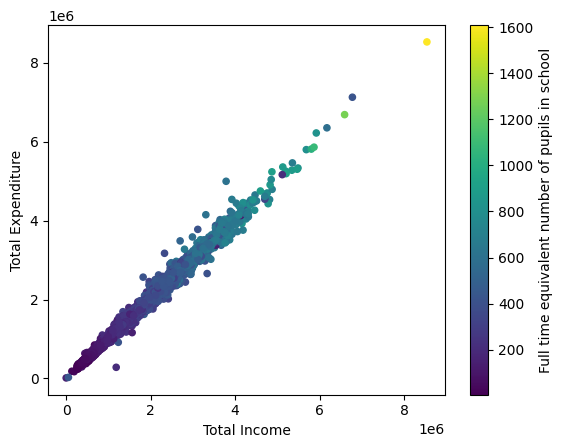

In [305]:
df.loc[(df2['Overall Phase'] == 'Primary') & (df2['Region'] != 'London')].plot.scatter(x='Total Income', y='Total Expenditure', c='Full time equivalent number of pupils in school')

In [306]:

df2['IE Ratio'] = (df2['Total Expenditure'] / df2['Total Income'])

print('Mean IE Ratio:', df2['IE Ratio'].mean())
print('Median IE Ratio:', df2['IE Ratio'].median())
print('Min IE Ratio:', df2['IE Ratio'].min())
print('Max IE Ratio:', df2['IE Ratio'].max())

print('STD IE Ratio:', df2['IE Ratio'].std())

Mean IE Ratio: 1.011421919207727
Median IE Ratio: 1.009331519636148
Min IE Ratio: 0.23832802609652762
Max IE Ratio: 6.470858165060909
STD IE Ratio: 0.07403596857514683


<Axes: xlabel='IE Ratio', ylabel='READPROG_19'>

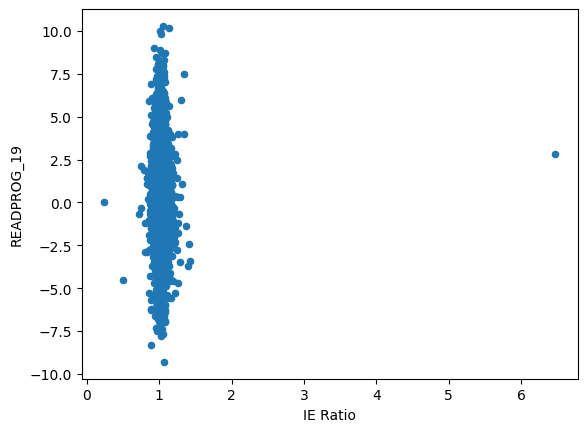

In [307]:
test = df2[~pd.to_numeric(df2['READ_AVERAGE'], errors='coerce').isnull()]
#test["OP"] = test[~pd.to_numeric(test['READPROG_19'], errors='coerce').isnull()]

test.plot.scatter(x='IE Ratio', y='READPROG_19')

<Axes: xlabel='Income per Student', ylabel='READPROG_19'>

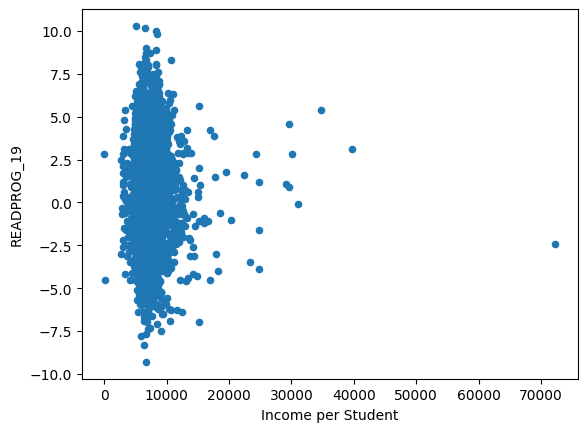

In [308]:
test.plot.scatter(x='Income per Student', y='READPROG_19')

<Axes: xlabel='Expenditure per Student', ylabel='READPROG_19'>

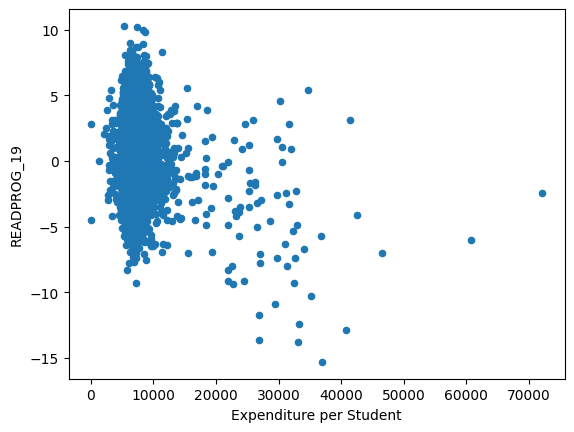

In [301]:
test.plot.scatter(x='Expenditure per Student', y='READPROG_19')

In [ ]:
test.plot.scatter(x='Expenditure per Student', y='READPROG_19')

In [ ]:
test.plot.scatter(x='Expenditure per Student', y='READPROG_19')